#  Introduction

## Strategic Approaches for Wellness Technology Companies

# Step 1: Ask

### Background

Bellabeat is a technology company specializing in health-focused smart products. Their product line includes smart devices designed to monitor various health metrics such as activity levels, sleep patterns, stress levels, and reproductive health. These devices aim to empower women by providing them with insights into their health and habits.

This case study focuses on analyzing fitness data collected by Bellabeat's smart devices to identify new growth opportunities. Specifically, we will examine the Bellabeat app, a central component of their product ecosystem.

The Bellabeat app offers users insights into their health metrics, including activity levels, sleep quality, stress levels, menstrual cycles, and mindfulness habits. By leveraging this data, users can gain a deeper understanding of their daily routines and make informed decisions to improve their overall well-being. The Bellabeat app integrates seamlessly with Bellabeat's range of smart wellness products.

### Key Stakeholders

* Urška Sršen, Co-founder and Chief Creative Officer at Bellabeat
* Sando Mur, Co-founder and pivotal member of Bellabeat's executive team
* Bellabeat Marketing Analytics team

### Bussiness Task

Given the aforementioned facts, the business objective is to analyze user patterns in the usage of Bellabeat's smart devices to glean insights that will inform targeted marketing decisions. Specifically, the goal is to understand how consumers utilize similar non-Bellabeat smart devices and apply these insights to enhance Bellabeat's marketing strategy.

# Step 2: Prepare

### Dataset used

The data source utilized for this case study is the FitBit Fitness Tracker Data, which is accessible via Kaggle. This dataset was obtained through Mobius and compiled from responses gathered via Amazon Mechanical Turk during a survey conducted between March 12, 2016, and May 12, 2016.

### Accessibility and privacy of data

The data is licensed under CC0: Public
Domain, waiving all of his or her rights to
the work worldwide under copyright law,
including all related and neighboring rights,
to the extend by law. The work can be
copied, modified, distributed and perform
the work, even for commercial purposes,
all without asking permission

### Data organization and verification

The dataset comprises 18 .csv files, with 15 in long format and 3 in wide format. It includes comprehensive information on various metrics such as activity levels, calorie expenditure, sleep patterns, metabolic equivalent of tasks (METs), heart rate, and step counts. The data is recorded across different timeframes, ranging from seconds and minutes to hours and days.

### Data limitations

The dataset comes with several limitations that could potentially impact the analysis results. These limitations include:

* Absence of demographic information
* Small sample size
* Limited duration of data collection period

# Step 3: Process

### Loading libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

### Importing datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_column')

In [3]:
df = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

### Data exploration

After uploading the dataset, we will initially assess its dimensions using the pandas .shape function to determine the number of rows and columns present.

In [4]:
df.shape

(940, 15)

We observe that our dataset consists of 940 rows and 15 columns. Next, we will examine the column names using the .columns function in pandas.

In [5]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

With the column names identified, let's proceed to get a quick overview of the dataset by examining the first few rows and the data itself using the .head() function in pandas.

In [6]:
df.head(10)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


The dataset captures daily data collected by FitBit Fitness tracking devices, which include smartwatches and fitness apps. Based on a preliminary view, we can summarize the columns as follows:

* Id: Unique identifier for each user in the survey.
* ActivityDate: Date of the data entry.
* TotalSteps: Total number of steps taken by each user per day.
* TotalDistance: Total distance covered by each user per day.
* TrackerDistance: Distance tracked by the device each day.
* LoggedActivitiesDistance: Distance tracked by the device during specific activities.
* VeryActiveDistance: Distance covered during very active physical activities.
* ModeratelyActiveDistance: Distance covered during moderately active physical activities.
* LightActiveDistance: Distance covered during lightly active physical activities.
* SedentaryActiveDistance: Distance covered during sedentary activities.
* VeryActiveMinutes: Minutes spent in a very active physical state.
* FairlyActiveMinutes: Minutes spent in a fairly active physical state.
* LightlyActiveMinutes: Minutes spent in a lightly active physical state.
* SedentaryMinutes: Minutes spent in a sedentary state.
* Calories: Calories burned on the specific day.

These columns provide insights into various aspects of daily physical activity and health metrics tracked by FitBit devices.

Now that we have reviewed the columns and examined the data, we can begin the process of data cleaning.

## Cleaning the data

### Checking Data types

First, we need to ensure that the data types of each column align with their respective content and intended use. We can achieve this by using the .dtypes function to inspect the data types of each column.

In [7]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

Upon review, we notice that the Id column is currently stored as an integer. However, for our purposes, it should be converted to a string or object datatype. This adjustment is necessary because the Id serves solely as an identifier, and we do not intend to perform mathematical operations, such as addition or multiplication, with it.

Additionally, the ActivityDate column is currently stored as an object datatype. To facilitate date-related operations and ensure consistency, it should be converted to a Date datatype.

All other columns appear to have the correct data types for their respective content and purposes.

In [8]:
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'],format="%m/%d/%Y")
df.dtypes # After reformating. We double check the data type

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

Next, we'll review the current formats and proceed with converting the 'Id' column from integer to string using the .astype(str) function. Similarly, we'll convert the 'ActivityDate' column from object or string to datetime format.

### Checking column values

After converting the data types, we can proceed to remove columns that are not relevant for our analysis. Initially, we'll consider the 'TotalDistance' column and other related distance tracking columns. While 'TotalDistance' and 'TrackerDistance' appear similar, we need to verify their relationship.

Additionally, we hypothesize that either 'TrackerDistance' or 'TotalDistance' could be the sum of the '*ActiveDistance' columns, but this assumption requires verification before proceeding further.

In [9]:
# We create a new column, adding up the "ActiveDistance" columns to see if it's equal to the 'TotalDistance' column, or the 'TrackerDistance' column
df['sum_distance'] = df['VeryActiveDistance'] + df['ModeratelyActiveDistance'] + df['LightActiveDistance'] + df['SedentaryActiveDistance']

# We also notice that 'LoggedActivitiesDistance' have 0.0 in value in most entries, but we filter to find where has more than 0
df.loc[(df['LoggedActivitiesDistance'] > 0),['TotalDistance','TrackerDistance','LoggedActivitiesDistance','sum_distance']]

,TotalDistance,TrackerDistance,LoggedActivitiesDistance,sum_distance
668,5.27,5.27,1.959596,5.08
689,9.71,7.88,4.081692,9.71
693,9.27,9.08,2.785175,9.26
707,8.72,8.68,3.167822,8.73
711,10.29,9.48,4.869783,10.29
712,9.65,8.60,4.851307,9.65
713,8.24,7.48,3.285415,8.25
717,10.98,9.91,4.930550,10.98
718,10.48,9.50,4.942142,10.48
719,11.31,10.41,4.924841,11.32


Based on our analysis, we have observed the following:

1. While 'TotalDistance' and 'TrackerDistance' are not always identical, they show a high degree of similarity across most entries.

2. Entries in the 'LoggedActivitiesDistance' column are generally minimal or non-zero.

3. The sum of the '*ActiveDistance' columns aligns closely with the 'TotalDistance' column, differing slightly due to rounding errors.

These observations suggest that 'TotalDistance' and 'TrackerDistance' are closely related metrics, and the '*ActiveDistance' columns contribute significantly to the total distance tracked.

Now, we need to decide whether to retain or remove certain columns based on our analysis:

1. We observed that 'TotalDistance' and 'TrackerDistance' are largely similar, with 'TotalDistance' often having higher values. Therefore, we will retain the 'TotalDistance' column.

2. The 'ActiveDistance' columns categorize different activity levels, such as 'Moderately Active' and 'Very Active'. While we lack specific details on their categorization criteria (such as heart rate or steps per minute), we will keep these columns for their potential insights.

3. Similarly, the 'ActiveMinutes' columns will be kept, and we will create a new column by summing these values.

This approach ensures we retain potentially valuable data while optimizing the dataset for our analysis.

In [10]:
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']

### Renaming columns

We will proceed by renaming the columns using the rename function and converting them to lowercase using str.lower() in pandas:

In [11]:
df.columns = df.columns.str.lower()
df.rename(columns = {'trackerdistance':'tracker_distance','activitydate':'activity_date','totalsteps':'total_steps','totaldistance':'total_distance',
       'loggedactivitiesdistance':'logged_activities_distance', 'veryactivedistance':'very_active_distance',
       'moderatelyactivedistance':'moderately_active_distance', 'lightactivedistance':'light_active_distance',
       'sedentaryactivedistance':'sedentary_active_distance', 'veryactiveminutes':'very_active_minutes',
       'fairlyactiveminutes':'fairly_active_minutes','lightlyactiveminutes':'lightly_active_minutes',
       'sedentaryminutes':'sedentary_minutes'}
         ,inplace=True) # We make the changes permanent by using inplace=True
print('Double check the name of the columns:')
df.columns

Double check the name of the columns:


Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'sum_distance', 'totalminutes'],
      dtype='object')

### Creating columns

To enhance our analysis, we will add a column indicating the day of the week using the datetime function day_name(), and another column with the numeric representation of the day of the week using the function weekday.

In [12]:
day_of_week = df['activity_date'].dt.day_name()
df['day_of_week'] = day_of_week
df['n_day_of_week'] = df['activity_date'].dt.weekday # 0 represents monday, 6 represents sunday

### Checking empty cells and null values

To identify null values in the dataset, we can use isna().sum() function in pandas.

In [13]:
print('Total number of null values are: ')
print(df.isna().sum())

Total number of null values are: 
id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
sum_distance                  0
totalminutes                  0
day_of_week                   0
n_day_of_week                 0
dtype: int64


To identify duplicate entries in the dataset, we can use the duplicated().sum() function in pandas.

In [14]:
print('Total number of duplicated values are: ',df.duplicated().sum())

Total number of duplicated values are:  0


### Subsetting the data

Next, we can select only the columns we will use for our analysis in this case.

In [15]:
df = df[['id', 'activity_date', 'total_steps', 'total_distance',
       #'tracker_distance', 'logged_activities_distance',
       #'very_active_distance', 'moderately_active_distance',
       #'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       #'sum_distance','totalminutes', 
       'day_of_week', 'n_day_of_week'
        ]].copy()

### Category creation

I will now categorize users based on their physical activity levels and device usage:

For physical activity:

* Sedentary: Average daily steps less than 6000.
* Active: Average daily steps between 6000 and 12000.
* Very active: Average daily steps more than 12000.

For device usage:

* Low use: Less than 8 hours of daily use.
* Normal use: Between 8 and 16 hours of daily use.
* High use: More than 16 hours of daily use.

For this dataset, I will start by creating the 'activity_level' category. I will consider creating the other category when analyzing datasets that store data on an hourly basis.

In [16]:
# I first group the data by the id
id_grp = df.groupby(['id'])

# Then I look for the average amount of steps, and sort the results in descending order
id_avg_step = id_grp['total_steps'].mean().sort_values(ascending=False)

# After that, I turn the results into a dataframe
id_avg_step = id_avg_step.to_frame()

# I want to create a new column which tells in which category each user fits into, depending on the average amount of steps
conditions = [
    (id_avg_step <=6000),
    (id_avg_step > 6000) & (id_avg_step < 12000),
    (id_avg_step >= 12000)
] # These are the conditions

values = ['sedentary','active','very_active'] # And here are the name of the values

# I create a column with the numpy function, np.select to asign each id a category
id_avg_step['activity_level'] = np.select(conditions,values)

# I store the results in a variable to use it in the next step
id_activity_level = id_avg_step['activity_level']

# I use a list comprehension to create the column in our original dataset.
# With this list comprehension I retrieve the categories where the index match the id column
df['activity_level'] = [id_activity_level[c] for c in df['id']]

# Step 4: Analyze

We will check the number of unique IDs using the nunique() function and list those unique IDs using the unique() function.

In [17]:
print('Number of unique values in id column:',df['id'].nunique())
print()
print('List of id values:',df['id'].unique())

Number of unique values in id column: 33

List of id values: ['1503960366' '1624580081' '1644430081' '1844505072' '1927972279'
 '2022484408' '2026352035' '2320127002' '2347167796' '2873212765'
 '3372868164' '3977333714' '4020332650' '4057192912' '4319703577'
 '4388161847' '4445114986' '4558609924' '4702921684' '5553957443'
 '5577150313' '6117666160' '6290855005' '6775888955' '6962181067'
 '7007744171' '7086361926' '8053475328' '8253242879' '8378563200'
 '8583815059' '8792009665' '8877689391']


Next, let's determine how frequently each ID appears in the dataset using value_counts().

In [18]:
print('How many times each id appear in the dataset?')
print(df['id'].value_counts())

How many times each id appear in the dataset?
id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64


There are 33 unique IDs or users in the dataset, with most appearing 31 times. Some IDs appear fewer times than that.

In [19]:
print('The min date is:',min(df['activity_date']))
print('The max date is:',max(df['activity_date']))
print('The number of unique dates are:',df['activity_date'].nunique())

The min date is: 2016-04-12 00:00:00
The max date is: 2016-05-12 00:00:00
The number of unique dates are: 31


Next, we can begin conducting exploratory data analysis.

In [20]:
# First we use the describe() function to see some statistics
df.describe()

,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,n_day_of_week
count,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2016-04-26 06:53:37.021276672,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574,2.918085
min,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000,1.000000
50%,2016-04-26 00:00:00,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000,3.000000
75%,2016-05-04 00:00:00,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000,5.000000
max,2016-05-12 00:00:00,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000,6.000000
std,NaN,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862,1.942379


Here we observe the mean, minimum, and maximum values, as well as the median (50th percentile), among others.

Notably, the maximum values indicate that one individual walked 28 miles and burned 4900 calories. These could potentially be outliers that we should investigate further.

# Step 5: Share 

## Correlation Analysis Between Calories and Steps

What is the correlation between the number of steps taken and the calories burned?

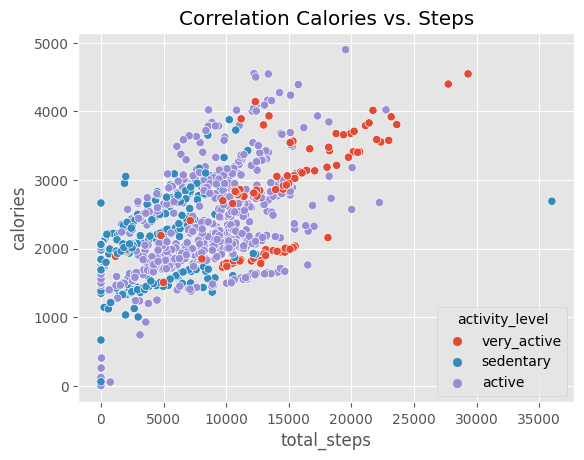

In [21]:
ax =sns.scatterplot(x='total_steps', y='calories', data=df,hue='activity_level')

#handles, labels = ax.get_legend_handles_labels()
#plt.legend(handles, day_of_week, fontsize=7)
plt.title('Correlation Calories vs. Steps')

plt.show()

We can see in this scatterplot a somewhat positive correlation, the more steps done, the more calories burnt.
Also we divided the dots by colors, using the activity_level category, so we can see which group is representing the data shown

## Average Daily Step Count

What is the average daily step count?

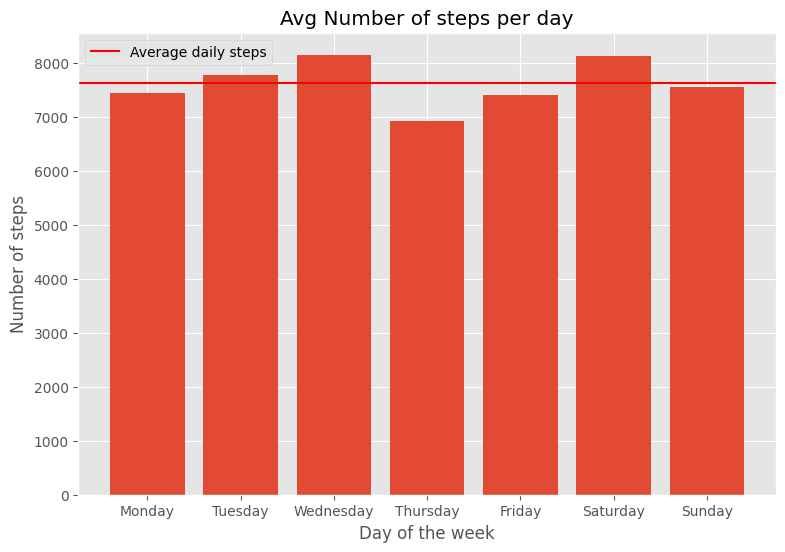

In [22]:
day_of_week = ['Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday','Sunday']
fig, ax =plt.subplots(1,1,figsize=(9,6))

day_grp = df.groupby(['day_of_week'])
avg_daily_steps= day_grp['total_steps'].mean()
avg_steps = df['total_steps'].mean()

plt.bar(avg_daily_steps.index,avg_daily_steps)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(y=avg_daily_steps.mean(),color='red', label='Average daily steps')
ax.set_ylabel('Number of steps')
ax.set_xlabel('Day of the week')
ax.set_title('Avg Number of steps per day')

plt.legend()
plt.show()

The data reveals that Monday, Tuesday, and Saturday stand out as days with higher than average physical activity levels in terms of step counts. Wednesday, Thursday, and Friday show activity levels below the average, with similar patterns across these three days. Sunday appears to be the least active among weekdays.

This information suggests that users tend to engage in more physical activity during the early days of the week and on Saturdays, providing insights into their likely activities during these periods.

## Percentage of activity in minutes

What percentage of the time are individuals active?

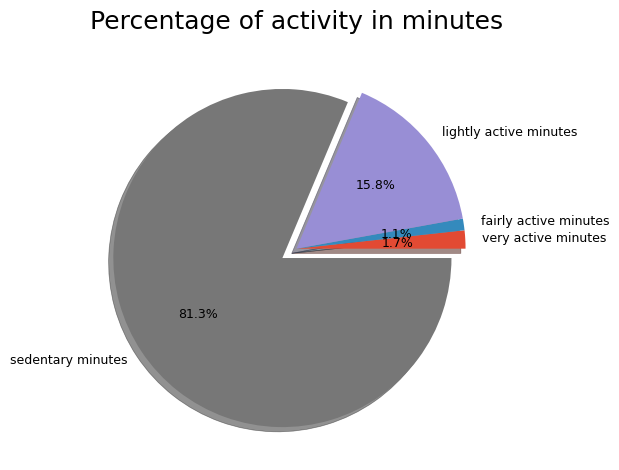

In [23]:
very_active_mins = df['very_active_minutes'].sum() 
fairly_active_mins = df['fairly_active_minutes'].sum()
lightly_active_mins = df['lightly_active_minutes'].sum()
sedentary_mins = df['sedentary_minutes'].sum()

slices = [very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins]
labels = ['very active minutes','fairly active minutes','lightly active minutes','sedentary minutes']
explode = [0,0,0,0.1]
plt.pie(slices, labels = labels, explode = explode, autopct='%1.1f%%',textprops=dict(size=9), shadow=True)

plt.title('Percentage of activity in minutes',fontsize=18)
plt.tight_layout()

plt.show()

This pie chart illustrates that users are predominantly in a sedentary state, spend about a sixth of their time engaged in light activity, and only 2% of their time in active exercise.

## Correlation Between Activity Level Minutes and Calories

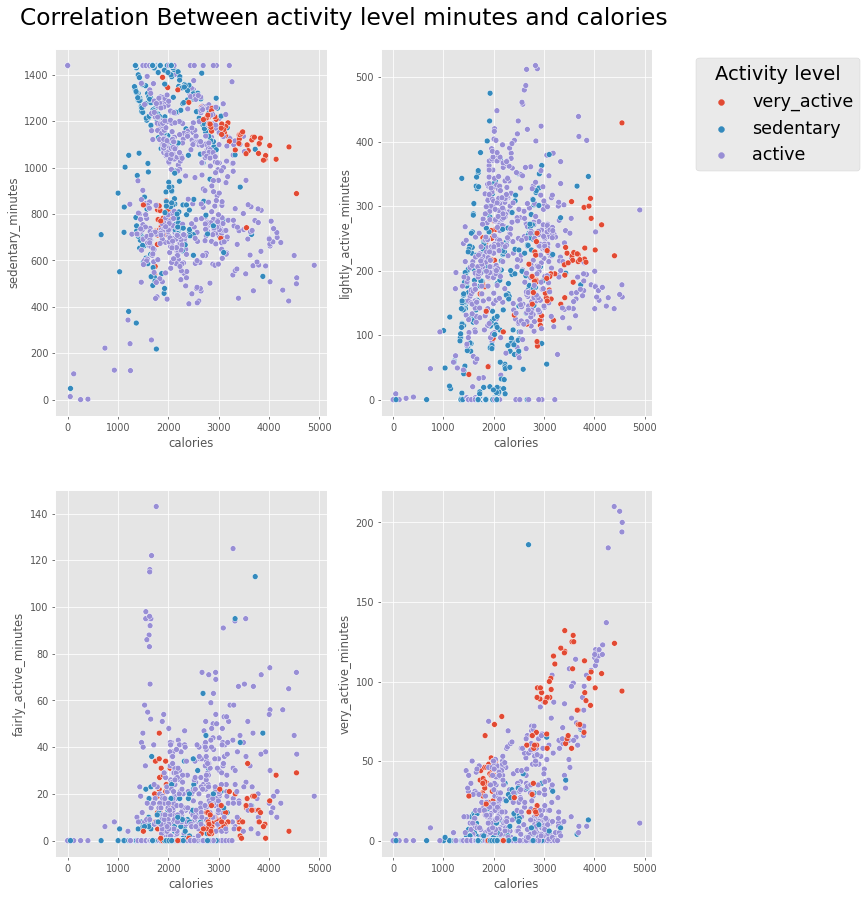

In [24]:
n_day_of_week = [0,1,2,3,4,5,6]

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(11,15),dpi=70)

sns.scatterplot(data=df,x='calories',y='sedentary_minutes',hue='activity_level',ax=axes[0,0],legend=False)

sns.scatterplot(data=df,x='calories',y='lightly_active_minutes',hue='activity_level',ax=axes[0,1],legend=False)

sns.scatterplot(data=df,x='calories',y='fairly_active_minutes',hue='activity_level',ax=axes[1,0],legend=False)

sns.scatterplot(data=df,x='calories',y='very_active_minutes',hue='activity_level',ax=axes[1,1])


plt.legend(title='Activity level',title_fontsize=20,bbox_to_anchor=(1.8,2.2),fontsize=18,frameon=True,scatterpoints=1)
fig.suptitle('Correlation Between activity level minutes and calories',x=0.5,y=0.92,fontsize=24)
plt.show()

## Step 6: Act

Upon analyzing the FitBit Fitness Tracker Data, we have identified insights that could inform Bellabeat's marketing strategy.

## A multipurpose device

Bellabeat can inform users that their products are not limited to sports or exercise-related activities. The data indicates that many users wear the tracking device more on weekends than weekdays, suggesting they may associate the product only with sports or leisurely activities like walking in the park on Sundays. Bellabeat can emphasize that their products are designed to accompany users throughout their daily routines, including work, and help them track information to enhance overall fitness and health. This approach aims to encourage women from various demographics and backgrounds to use Bellabeat products, which are tailored for all women interested in holistic health.

## Rewards and reminds

Bellabeat can inform users that their products are not limited to sports or exercise-related activities. The data indicates that many users wear the tracking device more on weekends than weekdays, suggesting they may associate the product only with sports or leisurely activities like walking in the park on Sundays. Bellabeat can emphasize that their products are designed to accompany users throughout their daily routines, including work, and help them track information to enhance overall fitness and health. This approach aims to encourage women from various demographics and backgrounds to use Bellabeat products, which are tailored for all women interested in holistic health.